In [1]:
import csv
import pandas
import matplotlib.pyplot as plt
import matplotlib
import collections
import numpy as np

In [2]:
#import data files
f1 = pandas.read_csv("/Users/caixiuhong/Dropbox/cai/btype_cco/crg_data/quick_run_mdlip/clustering/PLS/allexcludepls/crg_detail_ba3_clustering_PLS_allexcludepls.csv")
f2 = pandas.read_csv(r'/Users/caixiuhong/Dropbox/cai/btype_cco/crg_data/quick_run_mdlip/free_no_water/allexcludepls/crg_detail_ba3_allexcludepls.csv')

In [3]:
#print(f1.loc[:,'RA0010':'FA3K9303'])
if f1.loc[:, 'RA0010':'FA3K9303'].equals(f1.iloc[:,1:117]):
    print('True')
print(f2.shape)

True
(144, 142)


In [4]:
#calculate sum of charges at PLS for each substate and each structures
f1['sum_pls']=f1.loc[:,'YA0065':'RA0450'].sum(axis=1)
f2['sum_pls']=f2.loc[:,'YA0065':'RA0450'].sum(axis=1)

In [5]:
#calculate sum of charges at allexcludePLS for each substate and each structures
f1['sum_allexcludepls']=f1.loc[:,'RA0010':'FA3K9303'].sum(axis=1)
f2['sum_allexcludepls']=f2.loc[:,'RA0010':'FA3K9303'].sum(axis=1)

In [6]:
#reshape the sum_pls, make 12 data one sturctue
n1=f1['sum_pls'].size
n2=f2['sum_pls'].size
d1_sum_pls=f1['sum_pls'].values.reshape([n1//12,12])
d2_sum_pls=f2['sum_pls'].values.reshape([n2//12,12])

In [7]:
#reshape the sum_allexcluedpls, make 12 data one sturctue
n11=f1['sum_allexcludepls'].size
n22=f2['sum_allexcludepls'].size
d1_sum_allexcludepls=f1['sum_allexcludepls'].values.reshape([n11//12,12])
d2_sum_allexcludepls=f2['sum_allexcludepls'].values.reshape([n22//12,12])

In [8]:
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

selected_strucs=['p2_359_frame']
selected_strucs_pointer={}


states=[f1['state_snap'], f2['state_snap']]

color_map={"p1_": "orange", "dddro": "orange", "p2_": "purple", "pddro": "purple", "p3_": "green", "ppdro": "green",\
           "p4_": "cyan","dpdro": "cyan", "d372p_":"yellow", "d372ph376p": "red"}
colors={}
for i in range(len(states)):
    for j in range(0,len(states[i]), 12):
        struc=states[i][j][:-3]
        if struc not in selected_strucs: continue
        selected_strucs_pointer[struc]=[i,j//12]
        #print(struc)
        for key, value in color_map.items(): 
            if key in states[i][j]:
                colors[struc]=value
                break
        if all(key not in states[i][j] for key in color_map):
            colors[struc]="blue"

print(colors)
print(selected_strucs_pointer)



{'p2_359_frame': 'purple'}
{'p2_359_frame': [0, 61]}


In [9]:
# sum_pls and sum_allexcludepls data for selected_strucs
data_sum_pls=[d1_sum_pls,d2_sum_pls]
data_sum_allexcludepls =[d1_sum_allexcludepls, d2_sum_allexcludepls]

def selecte_strucs_data(d1,d2, selected_strucs, selected_strucs_pointer):
    data=[d1,d2]
    res={}
    for struc in selected_strucs:
        i, j =selected_strucs_pointer[struc][0],selected_strucs_pointer[struc][1]
        #print(data[selected_strucs_pointer[struc][0]][selected_strucs_pointer[struc][1]])
        res[struc]=data[i][j]
    return res

selected_sum_pls=selecte_strucs_data(d1_sum_pls, d2_sum_pls, selected_strucs, selected_strucs_pointer)
selected_sum_allexcludepls=selecte_strucs_data(d1_sum_allexcludepls,d2_sum_allexcludepls, selected_strucs, selected_strucs_pointer)

In [10]:
# get impose charge
impose_charge=[-1,-1,0,-1,-1,0,-1, -1,0,-1,-1,0]

In [11]:
#read ionize Y244, ionize Y248, ionize Y244_Y248 data
#import data files
f_Y244 = pandas.read_csv("/Users/caixiuhong/Dropbox/cai/btype_cco/crg_data/quick_run_mdlip/ionize_Y244_Y248/crg_detail_ba3_Y244.csv")
f_Y248 = pandas.read_csv(r'/Users/caixiuhong/Dropbox/cai/btype_cco/crg_data/quick_run_mdlip/ionize_Y244_Y248/crg_detail_ba3_Y248.csv')
f_Y244_Y248=pandas.read_csv(r'/Users/caixiuhong/Dropbox/cai/btype_cco/crg_data/quick_run_mdlip/ionize_Y244_Y248/crg_detail_ba3_Y244_Y248.csv')

#calculate sum of charges at PLS for each substate and each structures
f_Y244['sum_pls']=f_Y244.loc[:,'YA0065':'RA0450'].sum(axis=1)
f_Y248['sum_pls']=f_Y248.loc[:,'YA0065':'RA0450'].sum(axis=1)
f_Y244_Y248['sum_pls']=f_Y244_Y248.loc[:,'YA0065':'RA0450'].sum(axis=1)

#calculate sum of charges at allexcludePLS for each substate and each structures
f_Y244['sum_allexcludepls']=f_Y244.loc[:,'RA0010':'FA3K9303'].sum(axis=1)
f_Y248['sum_allexcludepls']=f_Y248.loc[:,'RA0010':'FA3K9303'].sum(axis=1)
f_Y244_Y248['sum_allexcludepls']=f_Y244_Y248.loc[:,'RA0010':'FA3K9303'].sum(axis=1)

#reshape the sum_pls, make 12 data one sturctue
n1=f_Y244['sum_pls'].size
n2=f_Y248['sum_pls'].size
n3=f_Y244_Y248['sum_pls'].size
d_Y244_sum_pls=f_Y244['sum_pls'].values.reshape([n1//12,12])
d_Y248_sum_pls=f_Y248['sum_pls'].values.reshape([n2//12,12])
d_Y244_Y248_sum_pls=f_Y244_Y248['sum_pls'].values.reshape([n3//12,12])

#reshape the sum_allexcluedpls, make 12 data one sturctue
n11=f_Y244['sum_allexcludepls'].size
n22=f_Y248['sum_allexcludepls'].size
n33=f_Y244_Y248['sum_allexcludepls'].size
d_Y244_sum_allexcludepls=f_Y244['sum_allexcludepls'].values.reshape([n11//12,12])
d_Y248_sum_allexcludepls=f_Y248['sum_allexcludepls'].values.reshape([n22//12,12])
d_Y244_Y248_sum_allexcludepls=f_Y244_Y248['sum_allexcludepls'].values.reshape([n33//12,12])

def decrease_base_list(base_line: float, data):
    res=[]
    for struc in data:
        new_list=[x+base_line for x in struc]
        res.append(new_list)
    return res

d_Y244_sum_allexcludepls_scale=decrease_base_list(-10, d_Y244_sum_allexcludepls)
d_Y248_sum_allexcludepls_scale=decrease_base_list(-10, d_Y248_sum_allexcludepls)
d_Y244_Y248_sum_allexcludepls_scale=decrease_base_list(-10, d_Y244_Y248_sum_allexcludepls)
print(d_Y244_sum_pls)




[[-2.35 -2.15 -3.   -2.97 -2.2  -2.95 -2.69 -2.   -2.87 -2.48 -2.   -2.82]]


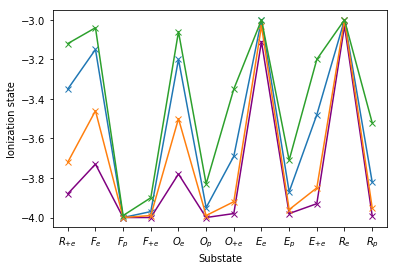

In [13]:
#plot the pls crg set
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

def decrease_base(base_line: float, data:dict):
    res={}
    for key, value in data.items():
        new_list=[x+base_line for x in value]
        res[key]=new_list
    return res

selected_sum_allexcludepls_scale=decrease_base(-10, selected_sum_allexcludepls)
#print(selected_sum_allexcludepls_scale)


outputpathway="/Users/caixiuhong/Dropbox/cai/btype_cco/crg_data/quick_run_mdlip"
#marker= ['^','o','v','X','s','*','<']
#x_label=['r5','f1','f3','f5','o1','o3','o5','e1','e3','e5','r1', 'r3']
x_label=['$R_{+e}$','$F_e$','$F_p$','$F_{+e}$','$O_e$','$O_p$','$O_{+e}$','$E_e$','$E_p$','$E_{+e}$','$R_e$', '$R_p$']


plt.figure()
#plt.figure(figsize=(15, 5))
plt.xticks(list(range(12)),x_label)

for struc in selected_strucs:
    #if struc != 'p2_25_frame': continue
    plt.plot(np.array(selected_sum_pls[struc]) -1, label='P3*'+'_pls', alpha=1, color=colors[struc], marker='x')
    #plt.plot(selected_sum_allexcludepls_scale[struc], label=struc+'excludepls', alpha=1, color=colors[struc],marker='o')

#plt.plot(impose_charge, label='imposed_charge', alpha=1, color='k', marker='o', markersize=10, markerfacecolor='none')

plt.plot(np.array(d_Y244_sum_pls[0])-1, label='ionized_Y244_'+'pls', alpha=1, marker='x')
plt.plot(np.array(d_Y248_sum_pls[0])-1, label='ionized_Y248_'+'pls', alpha=1,  marker='x')
plt.plot(np.array(d_Y244_Y248_sum_pls[0])-1, label='ionized_Y244_Y248_'+'pls', alpha=1, marker='x')

#plt.plot(d_Y244_sum_allexcludepls_scale[0], label='ionize_Y244_'+'excludepls', alpha=1, marker='o')
#plt.plot(d_Y248_sum_allexcludepls_scale[0], label='ionize_Y248_'+'excludepls', alpha=1,  marker='o')
#plt.plot(d_Y244_Y248_sum_allexcludepls_scale[0], label='ionize_Y244_Y248_'+'excludepls', alpha=1, marker='o')



#plt.legend(loc='center right')
plt.xlabel('Substate')
plt.ylabel('Ionization state')
plt.savefig(outputpathway+'/'+'All_Crg_State_ba3_p2_359_frame_ba3_Y244_Y2482_2.png', dpi=300)
plt.show()

#plt.clf()

#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]